In [56]:
import warnings
warnings.filterwarnings("ignore")

In [49]:
a = pd.read_csv('creditcard.csv')

<IPython.core.display.Javascript object>

In [50]:
a

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Class', ylabel='count'>

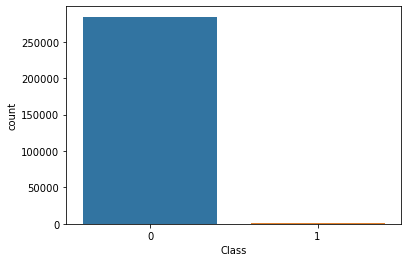

In [59]:
sns.countplot(a.Class)

## Though the data is highly imbalanced, it won't affect our model much since we would be using RandomForestClassifier

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:title={'center':'Fraud Distribution over Time'}, xlabel='Time', ylabel='Density'>

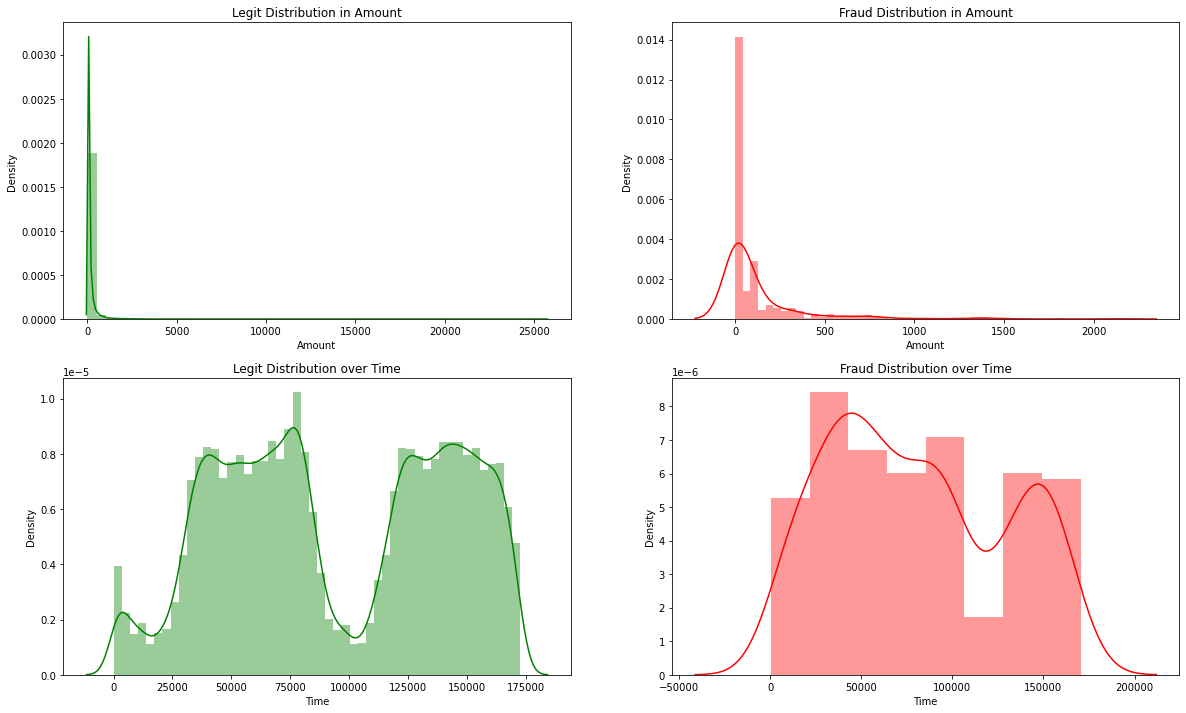

In [72]:
plt.figure(figsize = (20,12))
plt.subplot(2,2,1)
plt.title('Legit Distribution in Amount')
sns.distplot(a[a.Class==0].Amount, color = 'g')
plt.subplot(2,2,2)
plt.title('Fraud Distribution in Amount')
sns.distplot(a[a.Class==1].Amount, color = 'r')

plt.subplot(2,2,3)
plt.title('Legit Distribution over Time')
sns.distplot(a[a.Class==0].Time, color = 'g')
plt.subplot(2,2,4)
plt.title('Fraud Distribution over Time')
sns.distplot(a[a.Class==1].Time, color = 'r')


In [5]:
X = a.drop(['Class', 'Time'], axis = 1)
y = a.Class

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
b = scaler.fit_transform(X)

X_new = pd.DataFrame(b, columns = X.columns)

<IPython.core.display.Javascript object>

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(verbose=1, n_jobs=-1)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_new,y,test_size=0.2)

<IPython.core.display.Javascript object>

In [47]:
model_rf = rfc.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.4min finished


In [40]:
predict_rfc = model_rf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


In [19]:
print(metrics.accuracy_score(y_test, predict_rfc))
print(metrics.confusion_matrix(y_test, predict_rfc))
print(metrics.classification_report(y_test, predict_rfc))

<IPython.core.display.Javascript object>

0.9995962220427653


<IPython.core.display.Javascript object>

[[56870     4]
 [   19    69]]


<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.95      0.78      0.86        88

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



### Hyperparameter Tuning
- Result: it helped reducing false negative 
- Also slight improvement seen in recall

In [30]:
from sklearn.model_selection import RandomizedSearchCV

In [29]:
param = {
        'n_estimators' : [int(x) for x in [100,200,300]],
        'criterion' : ['gini', 'entropy'],
        'max_depth' : [int(x) for x in [10,20,30]],
        'max_features' : ['auto', 'sqrt', 'log2'],
        
}

In [32]:
rscv = RandomizedSearchCV(rfc, param_distributions=param, cv = 3, verbose=1, random_state=1 )
rscv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  3.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  3.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  4.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  6.8min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(verbose=1),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [100, 200, 300]},
                   random_state=1, verbose=1)

In [36]:
predict_hyp = rscv.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.3s finished


In [37]:
print(metrics.accuracy_score(y_test, predict_hyp))
print(metrics.confusion_matrix(y_test, predict_hyp))
print(metrics.classification_report(y_test, predict_hyp))

## we see that hypertuning reduced false negative which is our primary concnern in this case 

<IPython.core.display.Javascript object>

0.9996137776061234


<IPython.core.display.Javascript object>

[[56870     4]
 [   18    70]]


<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.95      0.80      0.86        88

    accuracy                           1.00     56962
   macro avg       0.97      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



### Checking if Over-Sampling improves performance
- For the current domain (Credit Card Fraud Detection) one must avoid resampling of dataset 
- Since real-world data will always remain highly imbalanced
- Tweaking the dataset might reduce bias but it will worsen variance 
- Result: performance reduces in - false negative, precision, recall as well f1_score 

In [85]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(0.4)

In [86]:
X_train_new, y_train_new = ros.fit_resample(X_train,y_train)

In [88]:
model_rf.fit(X_train_new, y_train_new)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished


RandomForestClassifier(n_jobs=-1, verbose=1)

In [92]:
predict_resample = model_rf.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [93]:
print(metrics.accuracy_score(y_test, predict_resample))
print(metrics.confusion_matrix(y_test, predict_resample))
print(metrics.classification_report(y_test, predict_resample))

## Hence we see that performance reduces in - false negative, precision, recall as well f1_score 

<IPython.core.display.Javascript object>

0.9994908886626171


<IPython.core.display.Javascript object>

[[56869     8]
 [   21    64]]


<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56877
           1       0.89      0.75      0.82        85

    accuracy                           1.00     56962
   macro avg       0.94      0.88      0.91     56962
weighted avg       1.00      1.00      1.00     56962

